In [82]:
def build_runner():
    all_the_functions = []
    def add_to_lib(func):
        all_the_functions.append(func)
        return func
    def runner(*args, **kwargs):
        for function in all_the_functions:
            result = function(*args, **kwargs)
            yield result
    return add_to_lib, runner

add_to_lib, gen_results = build_runner()

In [83]:
@add_to_lib
def my_function_1( x ):
    
    return x 

@add_to_lib
def my_function_2( x ):
    
    return x 

@add_to_lib
def my_function_3( x ):
    
    return x 

In [84]:
for result in gen_results(10):
    print( result )

10
10
10


# Sainty hekcs

In [85]:
from scipy.optimize import curve_fit
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from skbio import Protein 

In [90]:
my_functions = [] 
def sanity_check( f ):
    my_functions.append( f )
    return f 

@sanity_check
def check_name( name, dat ):
    
    if name == 'BglB':
        return '✔'
    
    protein = Protein.read( '../data_sets/reference/bglb.pep' )
    sequence_position = int( name[ 1:-1 ] ) - 1
    claimed_native_residue = name[0] 
    
    if claimed_native_residue == str( protein[ sequence_position ] ):
        return '✔'
    else:
        return 'FAILED'

@sanity_check
def check_michaelis_menten_fit( name, dat ):
    
    def f( x, k, K ): return k*x/(K+1)
    
    if np.isnan( dat[ 'kcat' ] ):
        return '✔'
    
    k = '../data_sets/assay_data/clean/kinetics.csv'
    df = pandas.read_csv( k )
    df = df[(df[ 'mutant' ] == name)]
    
    if len( df ) == 0:
        return 'FAILED' 
    
    x = df[ 's' ]
    y = df[ 'kobs' ] 
    p0 = ( x.max(), y.mean() ) # k, K 
    
    plt.scatter( x, y ) 
    
    popt, pcov = curve_fit( f=f, xdata=x, ydata=y, p0=p0 )  
    e = 1
    difference = dat[ [ 'kcat', 'km' ] ] - popt 
    print( dat[ [ 'kcat', 'km' ] ] ) 
    print( popt ) 
    print( difference ) 
    
@sanity_check
def check_melting_fit( name, dat ):
    
    
    if np.isnan( dat[ 'tm' ] ):
        return '✔'
    
    k = '../data_sets/assay_data/clean/thermal.csv'
    df = pandas.read_csv( k )
    df = df[(df[ 'mutant' ] == name)]
    
    if len( df ) == 0:
        return 'FAILED' 
    
    x = df[ 'temp' ]
    y = df[ 'rate' ] / df[ 'rate' ].max() 
    p0 = ( x.max(), y.mean() ) # k, K 
    

    def f(x, t, k): 
        return 1/(1+np.exp(-k*(x-t)))

    popt, pcov = curve_fit( f=f, xdata=x, ydata=y, p0=p0 )  
    e = 1
    difference = dat[ [ 'tm', 'k' ] ] - popt 
    print( dat[ [ 'tm', 'k' ] ] ) 
    print( popt ) 
    print( difference ) 

G12N
✔ 	 check_name
✔ 	 check_michaelis_menten_fit
✔ 	 check_melting_fit
-------------------------------------------
S14A
✔ 	 check_name
FAILED 	 check_michaelis_menten_fit
tm    40.16
k     -1.72
Name: S14A, dtype: float64
[ 40.01786944  -1.56503872]
tm    0.142131
k    -0.154961
Name: S14A, dtype: float64
None 	 check_melting_fit
-------------------------------------------
T15A
✔ 	 check_name
kcat    614.0
km        5.3
Name: T15A, dtype: float64
[ 18.10023648  -0.98001892]
kcat    595.899764
km        6.280019
Name: T15A, dtype: float64
None 	 check_michaelis_menten_fit
tm    39.17
k     -0.58
Name: T15A, dtype: float64
[ 38.69730695  -0.4587977 ]
tm    0.472693
k    -0.121202
Name: T15A, dtype: float64
None 	 check_melting_fit
-------------------------------------------
S16N
✔ 	 check_name
✔ 	 check_michaelis_menten_fit
✔ 	 check_melting_fit
-------------------------------------------
S16A
✔ 	 check_name
FAILED 	 check_michaelis_menten_fit
tm    39.41
k     -0.83
Name: S16A, dtype:

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

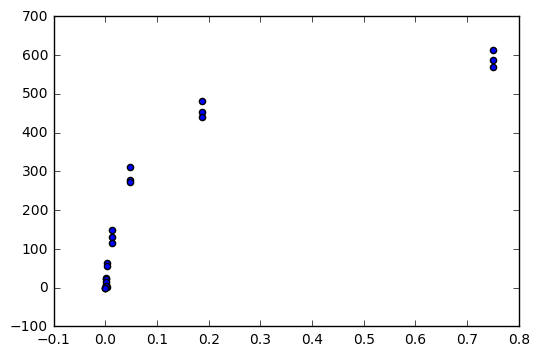

In [91]:
import pandas 

def run_checks():
    df = pandas.read_csv( 'data_set.csv', index_col=0 )
    for mutant_name, mutant_data in df.iterrows():
        print( mutant_name )
        for check in my_functions:
            print( check( mutant_name, mutant_data ), '\t', check.__name__ )
        print( '-------------------------------------------' )
        
run_checks()

In [88]:
import pytest

In [89]:
help( pytest )

Help on module pytest:

NAME
    pytest - pytest: unit and functional testing with Python.

SUBMODULES
    collect

CLASSES
    builtins.Exception(builtins.BaseException)
        _pytest.config.UsageError
    builtins.object
        _pytest.config.cmdline
    
    class UsageError(builtins.Exception)
     |  error in pytest usage or invocation
     |  
     |  Method resolution order:
     |      UsageError
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Data descriptors defined here:
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from builtins.Exception:
     |  
     |  __init__(self, /, *args, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __new__(*args, **kwargs) from builtins.type
     |      Create and retur